In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.offline as pyo
import cufflinks as cf
from plotly.offline import init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']= (17,8)

from sklearn.metrics import accuracy_score
import os

In [2]:
pyo.init_notebook_mode(connected = True)
cf.go_offline()

In [3]:
iris = pd.read_csv('D:\Projects\Iris Flower Classification\Iris.csv')

In [4]:
iris.drop(['Id'], axis = 1, inplace=True)

In [5]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
#Visualising the data
px.scatter(iris, x = 'Species', y = 'PetalWidthCm' , color = 'PetalWidthCm', size = 'PetalWidthCm')


In [7]:
px.scatter(iris, x = 'Species', y = 'PetalLengthCm' , color = 'PetalLengthCm', size = 'PetalLengthCm')

In [8]:
px.bar(iris,  x = 'Species', y = 'PetalWidthCm' , color = 'PetalWidthCm')

In [9]:
px.line(iris, x = 'Species', y = 'PetalWidthCm')

In [10]:
iris.rename(columns = {'SepalLengthCm': 'SepalLength', 'SepalWidthCm' : 'SepalWidth', 'PetalWidthCm':'PetalWidth', 'PetalLengthCm':'PetalLength'}, inplace = True)

In [11]:
px.scatter_matrix(iris, color = 'Species', title = 'Iris', dimensions = ['SepalLength', 'SepalWidth', 'PetalWidth', 'PetalLength'])

In [12]:
#Data Preprocessing
X = iris.drop(["Species"], axis = 1)
y = iris['Species']

In [13]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
X = np.array(X)

In [15]:
#Splitting the Data into Test set and Train set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [16]:
#Training the Dataset on Decision Tree
from sklearn import tree

DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
#Prediction
prediction_DT = DT.predict(X_test)
accuracy_DT = accuracy_score(y_test, prediction_DT)*100

In [18]:
os.environ['PATH'] = os.pathsep + (r'C:\Users\Pegasus\AppData\Local\Programs\Python\Python37\Graphviz2.38\bin')
import graphviz

vis_data = tree.export_graphviz(DT, out_file = None, feature_names = iris.drop(['Species'], axis = 1).keys(), class_names = iris['Species'].unique(), filled = True, rounded = True, special_characters = True)

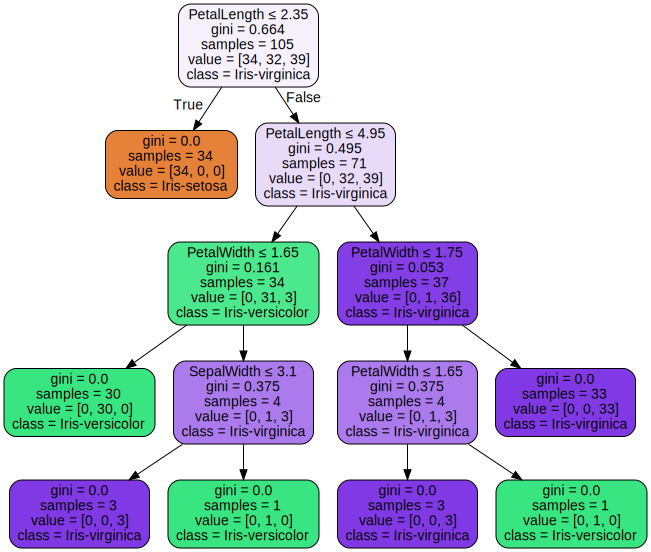

In [19]:
graphviz.Source(vis_data)

In [20]:
category = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [21]:
# Predict on custom input value
X_DT = np.array([[1, 1, 1, 1]])
X_DT_prediction = DT.predict(X_DT)
print(category[int(X_DT_prediction[0])])

Iris-setosa


In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [23]:
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
predict_knn=knn.predict(X_test_std)
accuracy_knn = accuracy_score(y_test, predict_knn)*100

In [25]:
accuracy_knn

97.77777777777777

In [26]:
#Lets predict on custom input value
X_knn = np.array([[7.7 ,3.5, 4.6, 4]]) 
X_knn_std = sc.transform(X_knn)
X_knn_std

array([[2.07024529, 1.03637663, 0.42953569, 3.56608443]])

In [27]:
X_knn_prediction=knn.predict(X_knn_std)
X_knn_prediction[0]
print(category[int(X_knn_prediction[0])])

Iris-virginica


In [28]:
#Finding Best K Value
k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std, y_train)
    prediction_knn = knn.predict(X_test_std)
    scores[k] = accuracy_score(y_test, prediction_knn)
    scores_list.append(accuracy_score(y_test, prediction_knn))
    

In [29]:
scores_list

[0.9333333333333333,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9333333333333333,
 0.9555555555555556,
 0.9333333333333333,
 0.9555555555555556,
 0.9333333333333333,
 0.9111111111111111,
 0.9111111111111111]

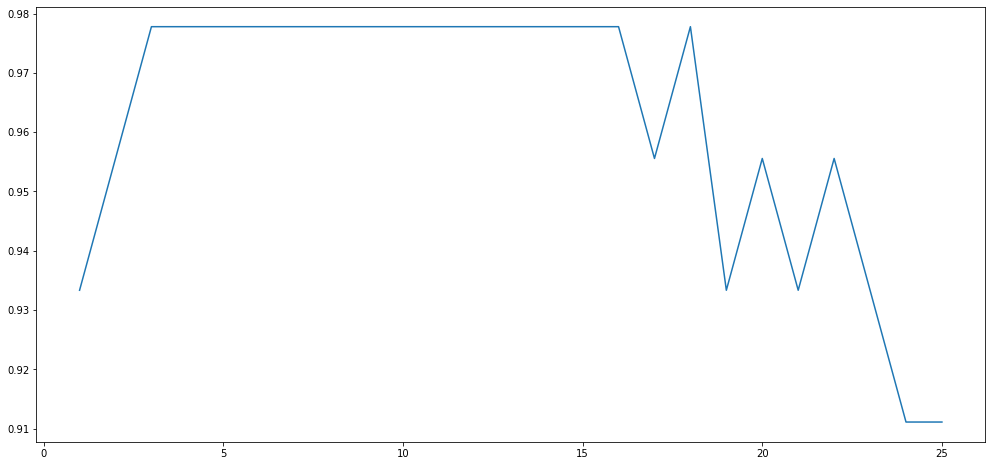

In [30]:
plt.plot(k_range, scores_list)

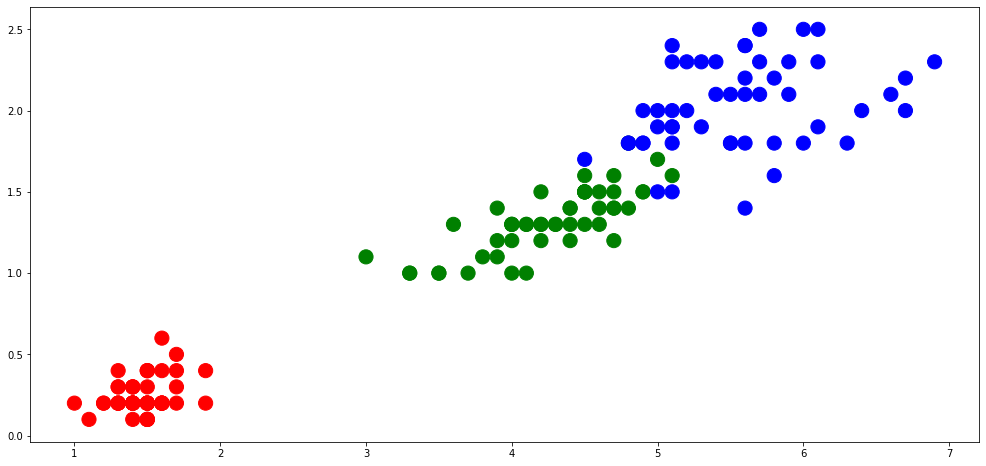

In [31]:
#K means Clustering

colormap = np.array(['red', 'green', 'blue'])
fig = plt.scatter(iris['PetalLength'], iris['PetalWidth'], c = colormap[y], s = 200)

In [32]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3,random_state=2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [33]:
centers=km.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [34]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [35]:
category_kmeans = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

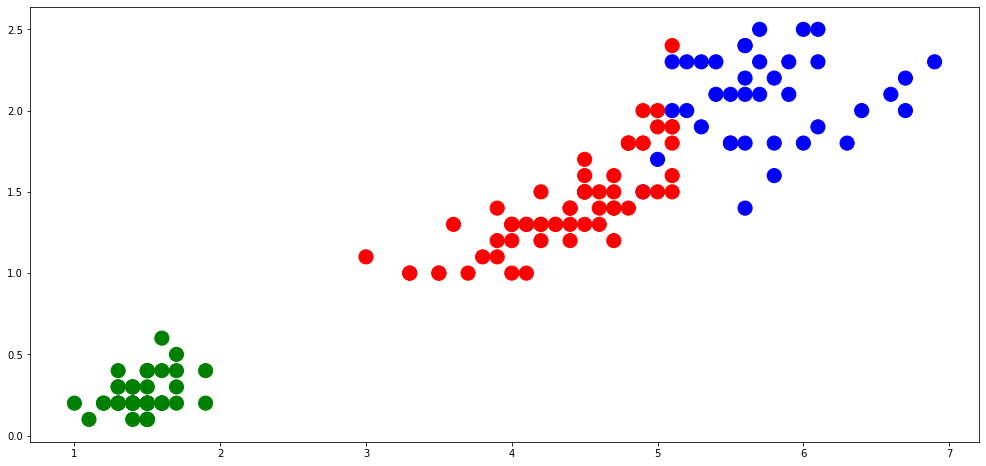

In [36]:
colormap = np.array(['red', 'green', 'blue'])
fig = plt.scatter(iris['PetalLength'], iris['PetalWidth'], c = colormap[km.labels_], s = 200)

Text(0.5, 1.0, 'Predicted')

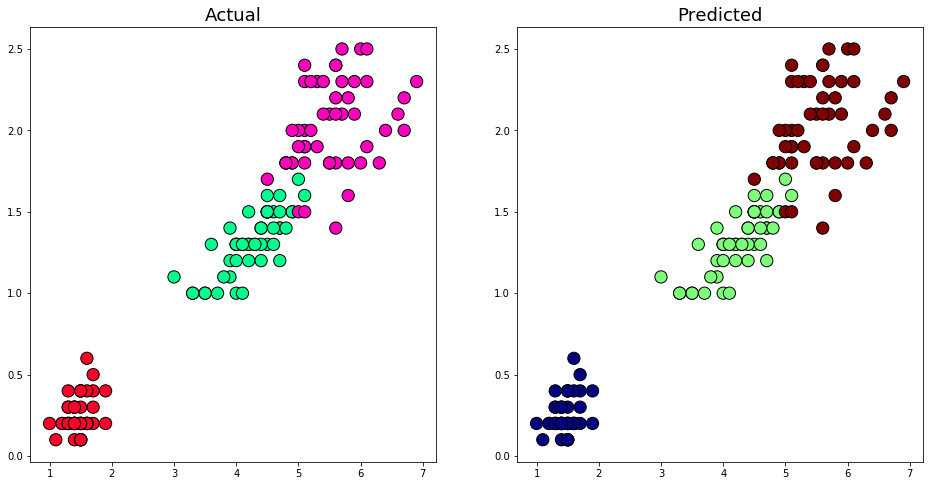

In [37]:
new_labels = km.labels_
fig,axes = plt.subplots(1,2,figsize=(16,8))
axes[0].scatter(X[:,2], X[:,3], c=y, cmap ='gist_rainbow', edgecolor = 'k',s = 150)
axes[1].scatter(X[:,2], X[:,3], c=y, cmap ='jet', edgecolor = 'k',s = 150)
axes[0].set_title('Actual',fontsize=18)
axes[1].set_title('Predicted',fontsize=18)

In [38]:
X_km = np.array([[1,1,1,1]])

In [39]:
X_km_prediction = km.predict(X_km)
X_km_prediction[0]
print(category_kmeans[int(X_km_prediction[0])])

Iris-setosa
